In [190]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
pd.set_option('display.max_columns',None)



from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly

sns.set(style='whitegrid')
plt.rcParams['figure.figsize']=(15,5)
%config InlineBackend.figure_format = 'png'
%matplotlib inline

Загружаем данные в датафреймы 

In [191]:
df_checks = pd.read_pickle("./df_checks.pkl")


In [192]:
df_shops = pd.read_pickle("./df_shops.pkl")
df_points = pd.read_pickle("./df_points.pkl")
df_left = pd.read_pickle("./df_left.pkl")


In [193]:

df_category = pd.read_pickle("./df_category.pkl")
df_checks_with_cat = pd.read_pickle("./df_checks_with_cat.pkl")
df_pivot_table = pd.read_pickle("./df_pivot_table.pkl")
df_week_diff = pd.read_pickle("./df_week_diff.pkl")
df_week_diff_cum = pd.read_pickle("./df_week_diff_cum.pkl")


In [194]:
df_checks_with_cat.head()

,id_tt_cl,id_tov_cl,Quantity,date_ch,BaseSum,"(name_gr, )","(id_tov, )"
0,10864,52,1.0,2022-03-01,119.09,Молочная Продукция,52.0
1,10864,52,1.0,2022-03-01,119.09,Молочная Продукция,52.0
2,10864,52,1.0,2022-03-01,119.09,Молочная Продукция,52.0
3,10864,52,1.0,2022-03-01,119.09,Молочная Продукция,52.0
4,10864,52,1.0,2022-03-01,119.09,Молочная Продукция,52.0


In [195]:
df_week_diff.head()

BaseSum                                                              \
week          9         10        11        12        13        14        15   
id_tt_cl                                                                       
10864        NaN -0.004450  0.023840 -0.007929 -0.004849  0.000026  0.002468   
11127        NaN -0.019523  0.017699 -0.009188 -0.006742  0.012755 -0.000154   
11128        NaN -0.013059  0.025461 -0.030335  0.010491  0.010250 -0.008861   
11160        NaN  0.015578  0.005551 -0.008874  0.001157 -0.010961  0.003956   
11178        NaN -0.003162 -0.000559 -0.003051 -0.008389  0.005939  0.001494   

                                                                                
week            16        17        18        19        20        21        22  
id_tt_cl                                                                        
10864    -0.008871  0.000146  0.004871 -0.004623  0.014366 -0.005647 -0.009958  
11127    -0.005311 -0.001718  0.000000 -0.011288  0.019616 -0.004736  0.002911  
11128    -0.011596  0.016557  0.003111 -0.009005  0.002585  0.017997 -0.032990  
11160    -0.005705 -0.008697  0.030730 -0.013237 -0.009302  0.003937  0.003871  
11178    -0.012630  0.008416  0.018733 -0.020254  0.028383 -0.011305 -0.011421

In [196]:
df_week_diff_cum.head()

BaseSum                                                              \
week          9         10        11        12        13        14        15   
id_tt_cl                                                                       
10864        NaN -0.004450  0.019390  0.011461  0.006612  0.006638  0.009106   
11127        NaN -0.019523 -0.001824 -0.011012 -0.017754 -0.004999 -0.005153   
11128        NaN -0.013059  0.012402 -0.017934 -0.007442  0.002808 -0.006054   
11160        NaN  0.015578  0.021129  0.012255  0.013412  0.002450  0.006406   
11178        NaN -0.003162 -0.003721 -0.006771 -0.015161 -0.009221 -0.007727   

                                                                                
week            16        17        18        19        20        21        22  
id_tt_cl                                                                        
10864     0.000235  0.000381  0.005252  0.000629  0.014995  0.009348 -0.000610  
11127    -0.010464 -0.012182 -0.012182 -0.023471 -0.003855 -0.008591 -0.005680  
11128    -0.017649 -0.001093  0.002018 -0.006986 -0.004401  0.013596 -0.019394  
11160     0.000702 -0.007995  0.022735  0.009498  0.000196  0.004133  0.008004  
11178    -0.020358 -0.011941  0.006791 -0.013462  0.014920  0.003615 -0.007806

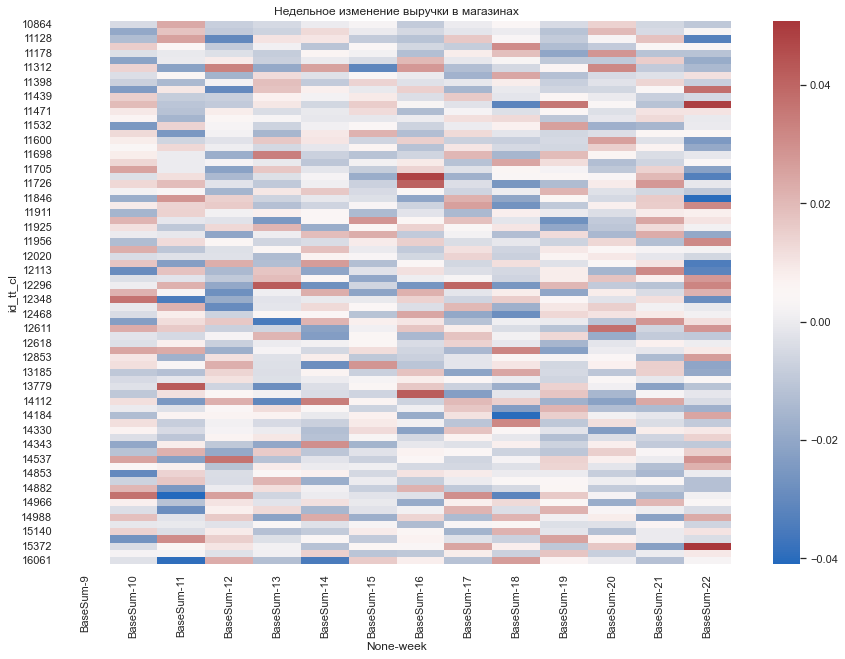

In [197]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_week_diff, cmap='vlag')
plt.title('Недельное изменение выручки в магазинах');

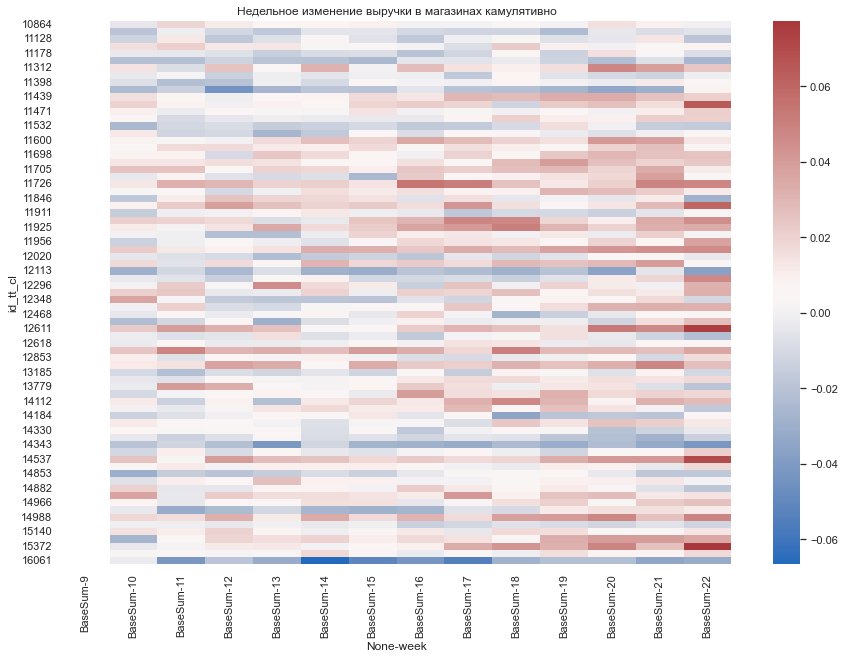

In [198]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_week_diff_cum, cmap='vlag')
plt.title('Недельное изменение выручки в магазинах камулятивно');

Немного Шлифуем данные по чекам

In [199]:
df_checks_with_cat.drop(('id_tov', ''),axis=1,inplace=True)
df_checks_with_cat.rename(columns = {('name_gr', ''):'name_gr'}, inplace = True)

In [200]:
df_category_pivot_items = df_checks_with_cat.pivot_table(columns=['name_gr'],index=['id_tt_cl'],values = ['Quantity'],aggfunc= 'sum',fill_value=0).reset_index()


Исправляем кривое форматирование пивот таблицы

In [201]:

df_category_pivot_items2 = pd.concat([df_category_pivot_items['id_tt_cl'].to_frame(),df_category_pivot_items.loc[:,'Quantity']], axis=1)

Добавляем по каждому магазину суммарное количество проданных итемов -- df_category_pivot_items2

In [202]:
df_category_pivot_items2['overal_items'] = df_category_pivot_items2.drop('id_tt_cl',axis=1).sum(axis=1)

Добавляем по каждому магазину количество проданных итемов в процентах по каждой категории -- df_category_pivot_items3

In [224]:
df_category_pivot_items3 = df_category_pivot_items2.copy()

In [225]:
for column in df_category_pivot_items3.drop(['id_tt_cl','overal_items'],axis=1):
    df_category_pivot_items3[column] = df_category_pivot_items3[column].div(df_category_pivot_items3['overal_items']/100)

In [226]:
df_category_pivot_items3.head()

,id_tt_cl,Айс ВкусВилл,Алкоголь,Архив,Бакалея,Бытовая Химия,ВВ Праздник,Выбор покупателя,Гастрополка,ДаркКитчен,Детские товары,Детское питание,Довериум,Замороженные десерты,Замороженные продукты,Интернет-магазин,Кафе,Консервация,Косметика,Кулинария,Кулинарный конструктор,Личная гигиена и уход,Медицинские товары,Микромаркет,Мировые бренды,Молочная Продукция,Мясная Витрина ВВ,Мясные деликатесы. Колбасы,Мясо. Птица. П/ф охл. Яйца,Напитки,Овощи. Фрукты. Грибы. Зелень,Отдел без упаковки,Пекарня,Подписки на товары и услуги,Проекты нон-фуд,Пространство ВкусВилл,Прочее,Рационы,Региональная полка,Рестораны,Рыба. Морепродукты,Рыбная витрина,"Сладости, кондитерские изделия","Сухофрукты. Сушеные овощи, грибы, ягоды. Орехи",Сыры,Товары для Еком контрагентов,Товары для дома,Товары для животных,"Торты, пирожные, десерты",ФС Общепит,Фрешбар,Хлеб,Чай и кофе. Проекты,Электронная Коммерция,overal_items
0,10864,0.008553,0.603306,0.053198,2.700766,0.109132,0.000000,0.000000,0.0,0.0,0.103830,0.296607,0.0,1.165560,0.454315,0.0,0.000171,1.029572,0.253673,6.767767,0.0,0.891190,0.101777,0.000000,0.026171,11.671504,0.0,1.052222,2.086866,2.952728,6.559261,0.000000,0.000171,0.004790,0.000171,0.000000,41.788408,0.0,0.0,0.000000,1.402460,0.0,4.753923,0.634951,1.125636,0.0,3.717851,0.192435,1.900064,0.0,0.000000,5.590972,0.000000,0.000000,584611.880
1,11127,0.045233,0.753699,0.083806,3.588120,0.176215,0.000833,0.000000,0.0,0.0,0.216453,0.497564,0.0,1.202423,0.926870,0.0,0.000278,1.055346,0.457048,7.102876,0.0,0.982085,0.152072,0.000000,0.027195,13.233864,0.0,1.459399,2.049987,3.520132,6.857334,0.001388,0.000278,0.016650,0.020813,0.000000,33.136970,0.0,0.0,0.000000,1.741055,0.0,5.961330,0.751479,1.367574,0.0,4.178093,0.296929,2.340742,0.0,0.000000,5.797693,0.000000,0.000176,360355.823
2,11128,0.013792,0.697483,0.060516,3.769447,0.128350,0.000000,0.000000,0.0,0.0,0.164379,0.553089,0.0,1.428461,1.068150,0.0,0.000000,1.331353,0.282314,9.516095,0.0,0.729570,0.102174,0.000844,0.018296,17.187687,0.0,1.525207,2.693875,3.668962,6.524298,0.000844,0.000563,0.007318,0.000000,0.000000,23.982093,0.0,0.0,0.000844,2.249470,0.0,6.261864,0.757436,1.600357,0.0,4.654952,0.236435,2.940518,0.0,0.000000,5.842583,0.000281,0.000099,355277.579
3,11160,0.022538,0.728642,0.086758,3.775043,0.135231,0.000000,0.000617,0.0,0.0,0.151903,0.664731,0.0,1.578003,0.985629,0.0,0.000000,1.201950,0.259347,11.544222,0.0,0.660718,0.087684,0.000000,0.035197,17.698893,0.0,1.630712,2.342253,4.649414,7.422891,0.002161,0.000000,0.009571,0.000000,0.104356,18.680398,0.0,0.0,0.000000,2.210290,0.0,6.186045,0.590323,1.512197,0.0,5.399050,0.195128,2.820399,0.0,0.000309,6.627395,0.000000,0.000000,323890.308
4,11178,0.013622,0.698172,0.054871,2.901470,0.141016,0.000192,0.000000,0.0,0.0,0.139097,0.691457,0.0,1.671660,0.582109,0.0,0.001919,1.096853,0.238096,7.490620,0.0,0.652509,0.106481,0.000959,0.015924,13.552090,0.0,1.259672,2.067692,3.638397,8.254427,0.000369,0.000000,0.020913,0.000000,0.000000,33.901329,0.0,0.0,0.000000,1.557082,0.0,5.112635,0.669777,1.327118,0.0,4.232390,0.178236,2.501638,0.0,0.000192,5.226652,0.002302,0.000062,521218.508


Выбираем хорошие и плохие магазины 

In [240]:
df_average =  df_shops['id_tt'].loc[df_shops['good_or_bad'] == 0].tolist()
df_bad =  df_shops['id_tt'].loc[df_shops['good_or_bad'] == -1].tolist()
df_good = df_shops['id_tt'].loc[df_shops['good_or_bad'] == 1].tolist()

In [243]:
df_category_good = df_category_pivot_items3.loc[df_category_pivot_items3['id_tt_cl'].isin(df_good)]
df_category_bad = df_category_pivot_items3.loc[df_category_pivot_items3['id_tt_cl'].isin(df_bad)]
df_category_average = df_category_pivot_items3.loc[df_category_pivot_items3['id_tt_cl'].isin(df_average)]


In [268]:
df_category_good_mn = df_category_good.mean(axis=0).to_frame(name="good")
df_category_bad_mn = df_category_bad.mean(axis=0).to_frame(name="average")
df_category_average_mn = df_category_average.mean(axis=0).to_frame(name="bad")


In [269]:


df_category_diff =  pd.concat([df_category_good_mn,df_category_average_mn, df_category_bad_mn], ignore_index=False, axis=1)

In [271]:
df_category_diff.to_excel("df_category_diff.xlsx")

In [273]:
df_category.to_excel("df_category.xlsx")
